In [ ]:
#######################
# CONFIG ZONE
#######################

# Importing Libs
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from collections import Counter
import numpy as np

# My Tools
import milanesas.eda_helper as eh
from tools.helpers import (
    get_column_uniques,
    get_column_uniques_count,
    plot_grouped_by_category_barh_charts,
    barh_chart_unique_values,
    print_unique_normalized_values_by_group,
    make_horizontal_grouped_chart,
    make_vertical_grouped_chart,
    grouped_grid_pie_chart,
    grouped_grid_barh_chart,
    create_grouped_dataframe_list,
    uniques_count_to_dataframe,
    barh_chart_normal_count,
    plot_uniques_count,
    barh_chart_count,
)


%matplotlib inline

# Reseting figure size params.
plt.rcParams["figure.figsize"] = [12, 7]
# Setting seaborn as default plotting lib.
sns.set()
sns.set_palette("pastel")

In [1]:
df = pd.read_csv("../data/data_fixed.csv")

In [2]:
df = df.drop("Unnamed: 0", axis=1)
df.columns

Index(['work_mode', 'employment_mode', 'role', 'prog_skills_in_role',
       'code_for_job', 'IT_exp', 'prof_prog_exp', 'first_code',
       'assigned_seniority', 'self_assessed_seniority', 'formal_edu', 'majors',
       'formal_edu_importance', 'gender', 'age', 'monthly_salary',
       'pro_languages', 'web_frameworks', 'other_tools', 'databases',
       'platforms', 'fav_language', 'least_fav_language', 'fav_framework',
       'least_fav_framework', 'tools', 'use_AI_tools', 'AI_replace_dev',
       'layoffs_23_24', 'working_now', 'unemployed_duration', 'same_role',
       'current_vs_prev_salary'],
      dtype='object')

In [3]:
df = df.dropna()

### 2. **Employment and Work Conditions**
   - Modalidad de trabajo
   - Modalidad de empleo
   - Puesto / rol
   - ¿Utilizás habilidades de programación en alguno de los siguientes roles/puestos?
   - ¿Codificás por trabajo?
   - ¿Qué nivel te asignaron en tu trabajo?
   - ¿Cuál considerás que es tu nivel en tu puesto?


## Modalidad de trabajo


In [4]:
df.columns

Index(['work_mode', 'employment_mode', 'role', 'prog_skills_in_role',
       'code_for_job', 'IT_exp', 'prof_prog_exp', 'first_code',
       'assigned_seniority', 'self_assessed_seniority', 'formal_edu', 'majors',
       'formal_edu_importance', 'gender', 'age', 'monthly_salary',
       'pro_languages', 'web_frameworks', 'other_tools', 'databases',
       'platforms', 'fav_language', 'least_fav_language', 'fav_framework',
       'least_fav_framework', 'tools', 'use_AI_tools', 'AI_replace_dev',
       'layoffs_23_24', 'working_now', 'unemployed_duration', 'same_role',
       'current_vs_prev_salary'],
      dtype='object')

In [5]:
get_column_uniques(df, "work_mode")
get_column_uniques_count(df, "work_mode")

work_mode
remote     4
none       1
Hibrído    1
onsite     1
Name: count, dtype: int64

In [6]:
uniques_count_to_dataframe(get_column_uniques_count(df, "work_mode"), 20)

,role,count
0,remote,4
1,none,1
2,Hibrído,1
3,onsite,1


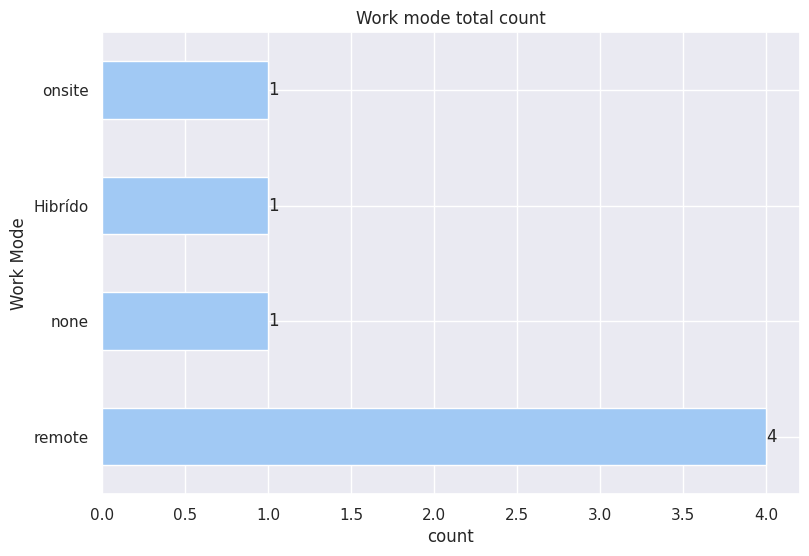

In [7]:
barh_chart_normal_count(
    df, "work_mode", title="Work mode total count", xlabel="count", ylabel="Work Mode"
)

## Modalidad de empleo


In [8]:
df.columns

Index(['work_mode', 'employment_mode', 'role', 'prog_skills_in_role',
       'code_for_job', 'IT_exp', 'prof_prog_exp', 'first_code',
       'assigned_seniority', 'self_assessed_seniority', 'formal_edu', 'majors',
       'formal_edu_importance', 'gender', 'age', 'monthly_salary',
       'pro_languages', 'web_frameworks', 'other_tools', 'databases',
       'platforms', 'fav_language', 'least_fav_language', 'fav_framework',
       'least_fav_framework', 'tools', 'use_AI_tools', 'AI_replace_dev',
       'layoffs_23_24', 'working_now', 'unemployed_duration', 'same_role',
       'current_vs_prev_salary'],
      dtype='object')

In [9]:
get_column_uniques(df, "employment_mode")

['Empleador local (Paraguay)',
 'foreign_employer',
 'freelance',
 'local_with_foreign_clients']

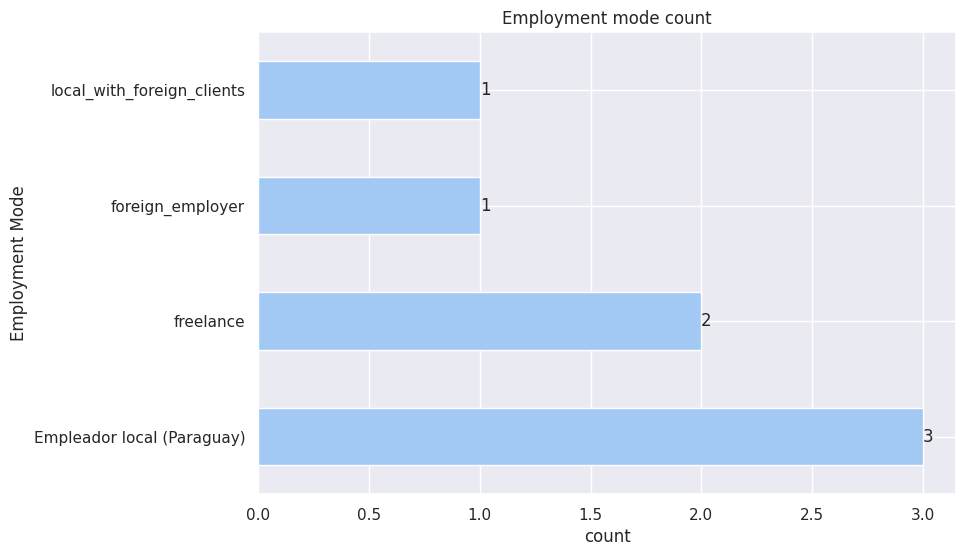

In [10]:
barh_chart_normal_count(
    df,
    "employment_mode",
    title="Employment mode count",
    xlabel="count",
    ylabel="Employment Mode",
)

## Puesto / rol


In [11]:
df.columns

Index(['work_mode', 'employment_mode', 'role', 'prog_skills_in_role',
       'code_for_job', 'IT_exp', 'prof_prog_exp', 'first_code',
       'assigned_seniority', 'self_assessed_seniority', 'formal_edu', 'majors',
       'formal_edu_importance', 'gender', 'age', 'monthly_salary',
       'pro_languages', 'web_frameworks', 'other_tools', 'databases',
       'platforms', 'fav_language', 'least_fav_language', 'fav_framework',
       'least_fav_framework', 'tools', 'use_AI_tools', 'AI_replace_dev',
       'layoffs_23_24', 'working_now', 'unemployed_duration', 'same_role',
       'current_vs_prev_salary'],
      dtype='object')

In [12]:
# Assuming get_column_uniques_count returns a Series object
role_counts = get_column_uniques_count(df, "role")

role_counts_df = uniques_count_to_dataframe(role_counts, 10)

In [13]:
role_counts

role
full_stack_dev      3
backend_dev         2
mobile_dev          2
backend_arch        1
db_admin            1
data_eng            1
quality_analyst     1
frontend_dev        1
Name: count, dtype: int64

In [14]:
role_counts_df

,role,count
0,full_stack_dev,3
1,backend_dev,2
2,mobile_dev,2
3,backend_arch,1
4,db_admin,1
5,data_eng,1
6,quality_analyst,1
7,frontend_dev,1


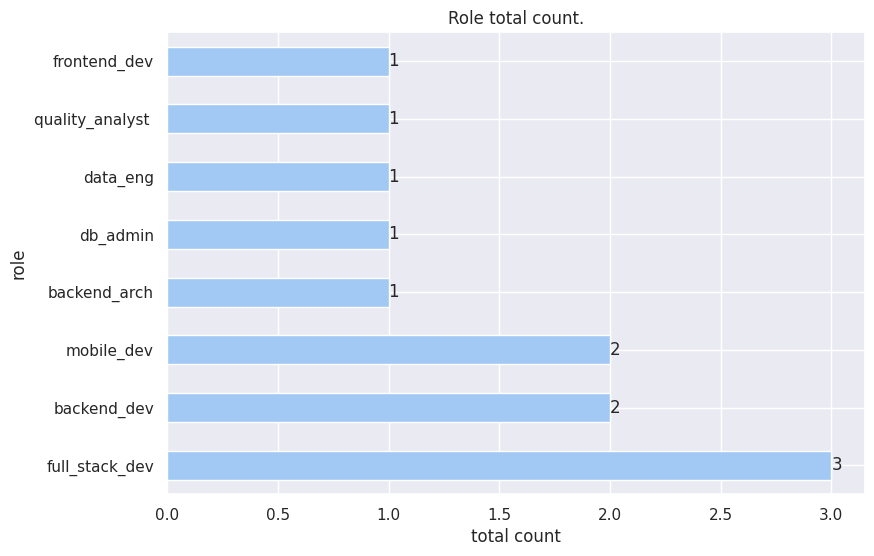

In [15]:
barh_chart_normal_count(df, "role", "Role total count.", "total count", "role")

## Modalidad vs Seniority asignado.

In [43]:
df.columns

Index(['work_mode', 'employment_mode', 'role', 'prog_skills_in_role',
       'code_for_job', 'IT_exp', 'prof_prog_exp', 'first_code',
       'assigned_seniority', 'self_assessed_seniority', 'formal_edu', 'majors',
       'formal_edu_importance', 'gender', 'age', 'monthly_salary',
       'pro_languages', 'web_frameworks', 'other_tools', 'databases',
       'platforms', 'fav_language', 'least_fav_language', 'fav_framework',
       'least_fav_framework', 'tools', 'use_AI_tools', 'AI_replace_dev',
       'layoffs_23_24', 'working_now', 'unemployed_duration', 'same_role',
       'current_vs_prev_salary'],
      dtype='object')

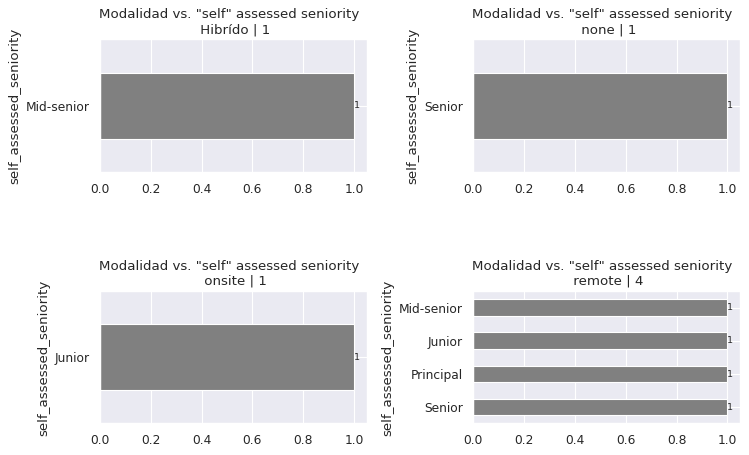

In [46]:
grouped_grid_barh_chart(
    df.groupby("work_mode"),
    "self_assessed_seniority",
    'Modalidad vs. "self" assessed seniority ',
    2,
    2,
    "gray",
    8.5,
)

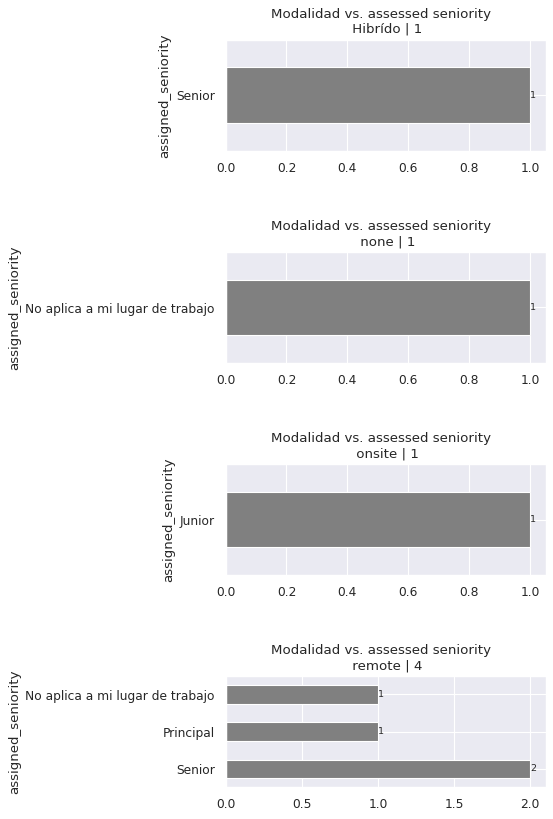

In [49]:
grouped_grid_barh_chart(
    df.groupby("work_mode"),
    "assigned_seniority",
    "Modalidad vs. assessed seniority ",
    5,
    1,
    "gray",
    8.5,
)

## Modalidad vs Seniority auto asignado.

## ¿Utilizás habilidades de programación en alguno de los siguientes roles/puestos?


In [16]:
df.columns

Index(['work_mode', 'employment_mode', 'role', 'prog_skills_in_role',
       'code_for_job', 'IT_exp', 'prof_prog_exp', 'first_code',
       'assigned_seniority', 'self_assessed_seniority', 'formal_edu', 'majors',
       'formal_edu_importance', 'gender', 'age', 'monthly_salary',
       'pro_languages', 'web_frameworks', 'other_tools', 'databases',
       'platforms', 'fav_language', 'least_fav_language', 'fav_framework',
       'least_fav_framework', 'tools', 'use_AI_tools', 'AI_replace_dev',
       'layoffs_23_24', 'working_now', 'unemployed_duration', 'same_role',
       'current_vs_prev_salary'],
      dtype='object')

In [17]:
# Get column uniques.
prog_in_rol_uniques = get_column_uniques(df, "prog_skills_in_role")

In [18]:
prog_in_rol_uniques

['devops_dataops',
 'scientific_researcher',
 'sys_admin',
 'designer',
 'educator']

In [19]:
# Obtenemos el conteo total por categoria.
prog_in_role_count = get_column_uniques_count(df, "prog_skills_in_role")
prog_in_role_df = uniques_count_to_dataframe(prog_in_role_count, 10)

In [20]:
prog_in_role_df.columns

Index(['role', 'count'], dtype='object')

In [21]:
prog_in_role_df

,role,count
0,sys_admin,4
1,devops_dataops,3
2,scientific_researcher,1
3,designer,1
4,educator,1


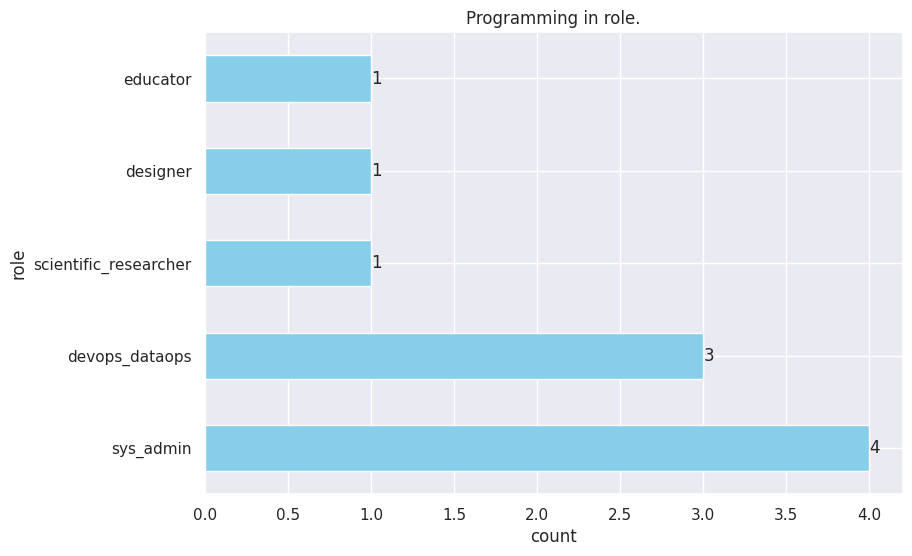

In [22]:
plot_uniques_count(prog_in_role_df, "Programming in role.", "count", "role")

## ¿Codificás por trabajo?


In [23]:
df.columns

Index(['work_mode', 'employment_mode', 'role', 'prog_skills_in_role',
       'code_for_job', 'IT_exp', 'prof_prog_exp', 'first_code',
       'assigned_seniority', 'self_assessed_seniority', 'formal_edu', 'majors',
       'formal_edu_importance', 'gender', 'age', 'monthly_salary',
       'pro_languages', 'web_frameworks', 'other_tools', 'databases',
       'platforms', 'fav_language', 'least_fav_language', 'fav_framework',
       'least_fav_framework', 'tools', 'use_AI_tools', 'AI_replace_dev',
       'layoffs_23_24', 'working_now', 'unemployed_duration', 'same_role',
       'current_vs_prev_salary'],
      dtype='object')

In [24]:
# Unique values in column.
get_column_uniques(df, "code_for_job")

['Yes', 'No']

In [25]:
prog_in_job_count = get_column_uniques_count(df, "code_for_job")

In [26]:
cod_for_job_df = uniques_count_to_dataframe(prog_in_job_count)

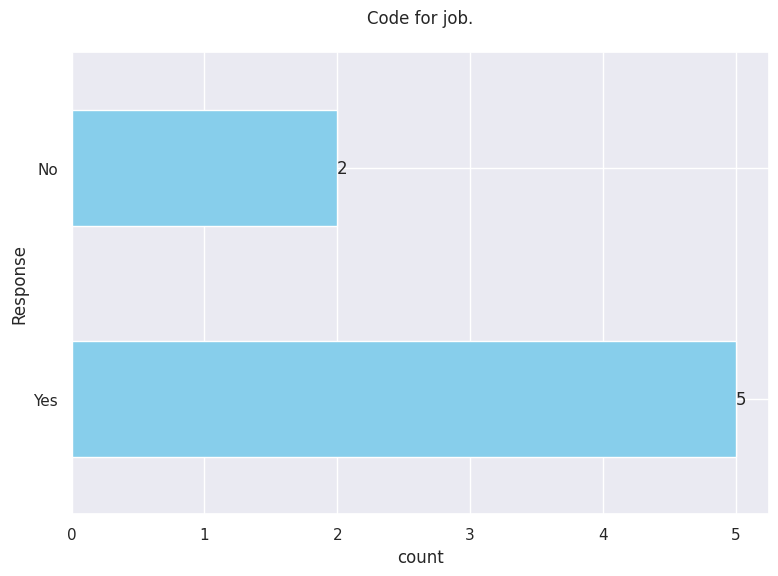

In [27]:
plot_uniques_count(cod_for_job_df, "Code for job.\n", "count", "Response")

## ¿Qué nivel te asignaron en tu trabajo?


In [28]:
df.columns

Index(['work_mode', 'employment_mode', 'role', 'prog_skills_in_role',
       'code_for_job', 'IT_exp', 'prof_prog_exp', 'first_code',
       'assigned_seniority', 'self_assessed_seniority', 'formal_edu', 'majors',
       'formal_edu_importance', 'gender', 'age', 'monthly_salary',
       'pro_languages', 'web_frameworks', 'other_tools', 'databases',
       'platforms', 'fav_language', 'least_fav_language', 'fav_framework',
       'least_fav_framework', 'tools', 'use_AI_tools', 'AI_replace_dev',
       'layoffs_23_24', 'working_now', 'unemployed_duration', 'same_role',
       'current_vs_prev_salary'],
      dtype='object')

In [29]:
# Get unique values in column.
get_column_uniques(df, "assigned_seniority")

['Senior', 'Principal', 'No aplica a mi lugar de trabajo', 'Junior']

In [30]:
get_column_uniques_count(df, "assigned_seniority")

assigned_seniority
Senior                             3
No aplica a mi lugar de trabajo    2
Principal                          1
Junior                             1
Name: count, dtype: int64

In [31]:
len(df["assigned_seniority"])

7

In [32]:
df["assigned_seniority"]

2                               Senior
40                           Principal
152    No aplica a mi lugar de trabajo
206                             Senior
303                             Junior
312    No aplica a mi lugar de trabajo
391                             Senior
Name: assigned_seniority, dtype: object

In [33]:
assigned_seniority_df = uniques_count_to_dataframe(
    get_column_uniques_count(df, "assigned_seniority")
)

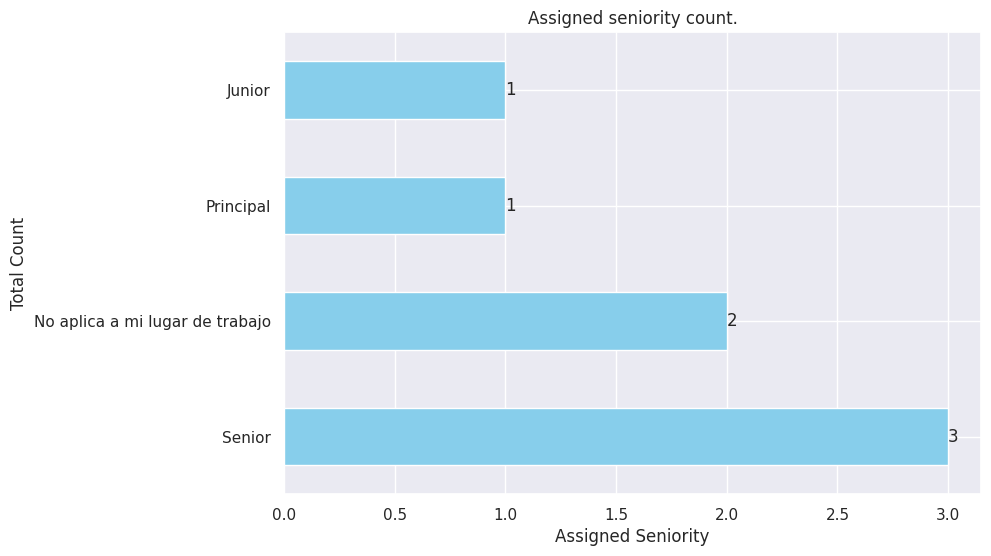

In [34]:
plot_uniques_count(
    assigned_seniority_df,
    "Assigned seniority count.",
    "Assigned Seniority",
    "Total Count",
)

## ¿Cuál considerás que es tu nivel en tu puesto?


In [35]:
# Obtener los valores unicos de la columna.
get_column_uniques(df, "self_assessed_seniority")

['Senior', 'Principal', 'Mid-senior', 'Junior']

In [36]:
# Obtener el conteo total de la columns.

In [37]:
get_column_uniques_count(df, "self_assessed_seniority")

self_assessed_seniority
Senior        2
Mid-senior    2
Junior        2
Principal     1
Name: count, dtype: int64

In [38]:
self_assigned_seniority_df = uniques_count_to_dataframe(
    get_column_uniques_count(df, "self_assessed_seniority")
)

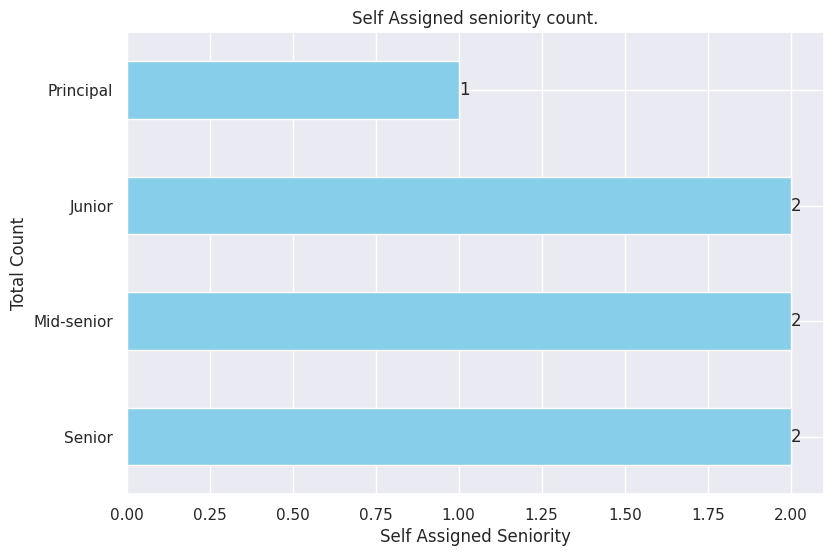

In [39]:
plot_uniques_count(
    self_assigned_seniority_df,
    "Self Assigned seniority count.",
    "Self Assigned Seniority",
    "Total Count",
)